In [48]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
batch_metadata = unpickle('Dataset/cifar-10-batches-py/batches.meta')
batch_1 = unpickle('Dataset/cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('Dataset/cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('Dataset/cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('Dataset/cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('Dataset/cifar-10-batches-py/data_batch_5')
test_batch = unpickle('Dataset/cifar-10-batches-py/test_batch')

In [13]:
train_x = []
train_x.extend(batch_1[b'data'])
train_x.extend(batch_2[b'data'])
train_x.extend(batch_3[b'data'])
train_x.extend(batch_4[b'data'])
train_x.extend(batch_5[b'data'])
train_x = np.array(train_x)
train_x_img = train_x.reshape(train_x.shape[0],3,32,32)
print(train_x.shape)
print(train_x_img.shape)

(50000, 3072)
(50000, 3, 32, 32)


In [5]:
train_y = []
train_y.extend(batch_1[b'labels'])
train_y.extend(batch_2[b'labels'])
train_y.extend(batch_3[b'labels'])
train_y.extend(batch_4[b'labels'])
train_y.extend(batch_5[b'labels'])
train_y = np.array(train_y)
print(train_y.shape)

(50000,)


In [6]:
test_x = test_batch[b'data']
test_x = np.array(test_x)
test_x_img = test_x.reshape(test_x.shape[0],3,32,32)
print(test_x.shape)
print(test_x_img.shape)

(10000, 3072)
(10000, 3, 32, 32)


In [7]:
test_y = test_batch[b'labels']
test_y = np.array(test_y)
print(test_y.shape)

(10000,)


In [16]:
labels_vs_id = {index : str(label,'utf-8') for index,label in enumerate(batch_metadata[b'label_names'])}

In [26]:
print(type(labels_vs_id))
print(len(labels_vs_id))
print(labels_vs_id)

<class 'dict'>
10
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


airplane


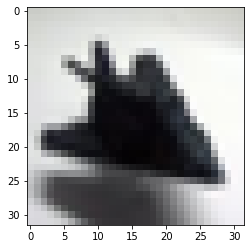

airplane


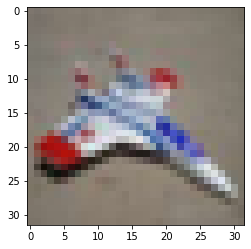

airplane


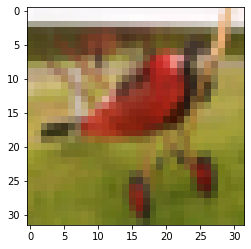

airplane


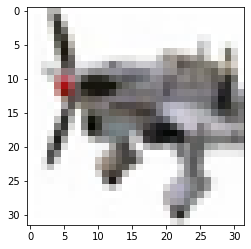

airplane


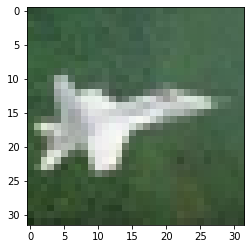

automobile


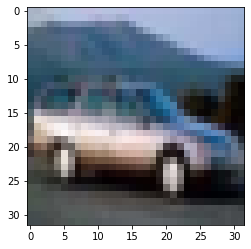

automobile


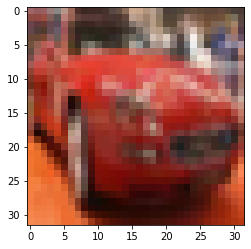

automobile


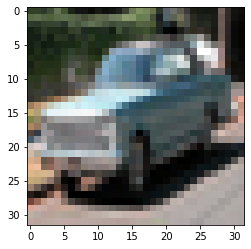

automobile


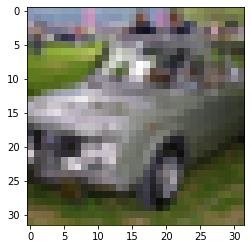

automobile


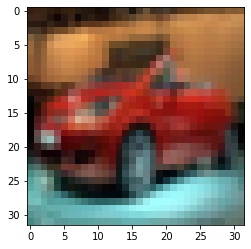

bird


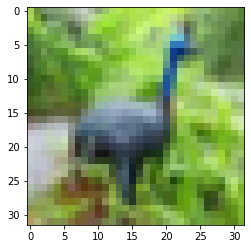

bird


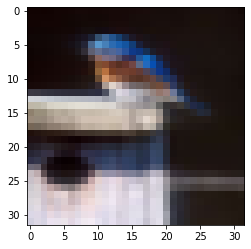

bird


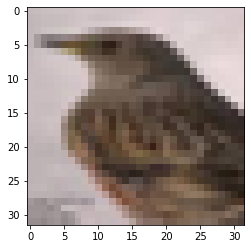

bird


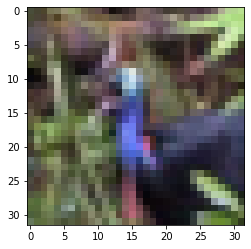

bird


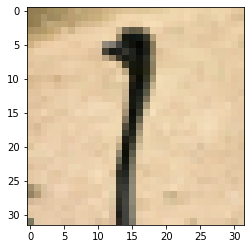

cat


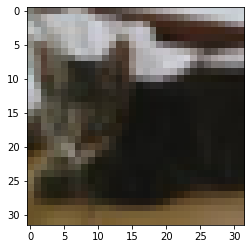

cat


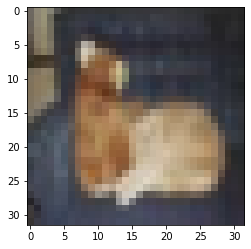

cat


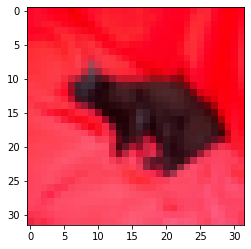

cat


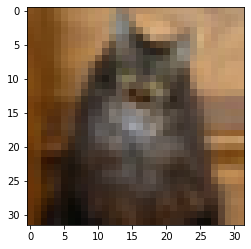

cat


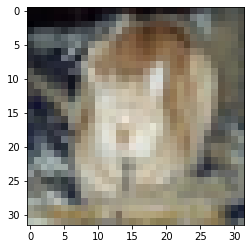

deer


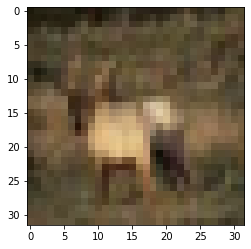

deer


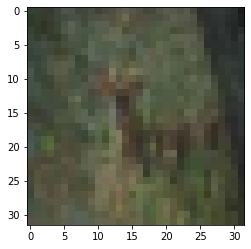

deer


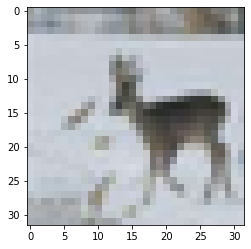

deer


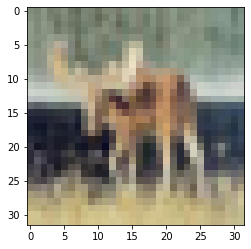

deer


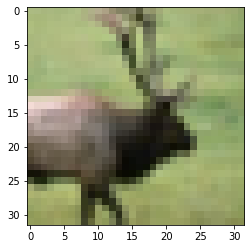

dog


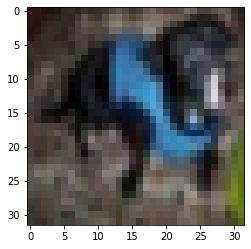

dog


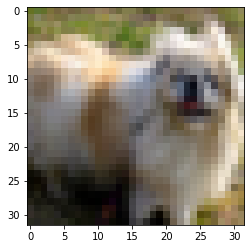

dog


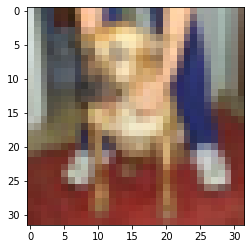

dog


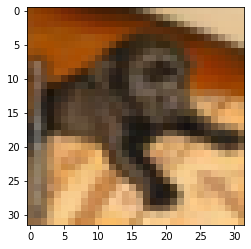

dog


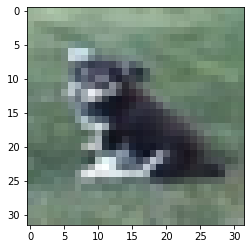

frog


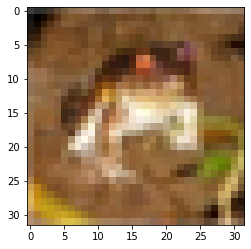

frog


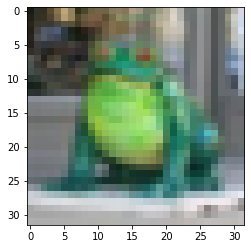

frog


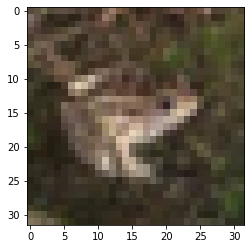

frog


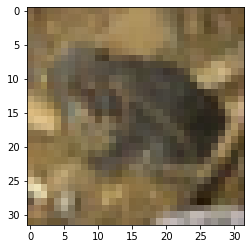

frog


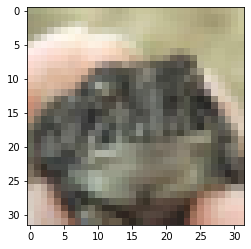

horse


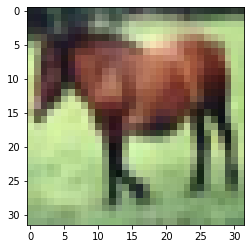

horse


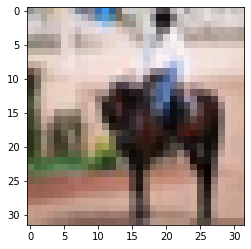

horse


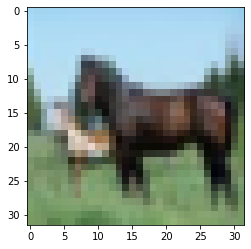

horse


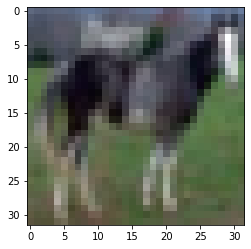

horse


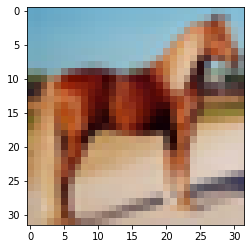

ship


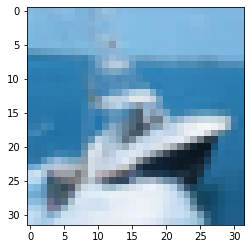

ship


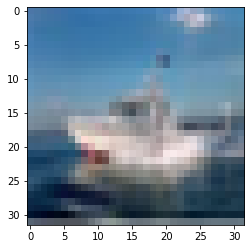

ship


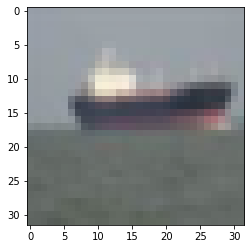

ship


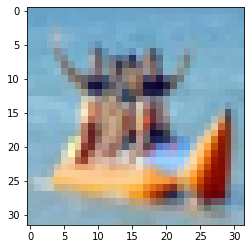

ship


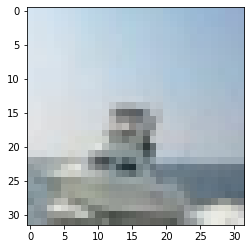

truck


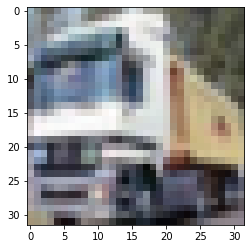

truck


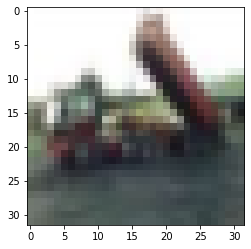

truck


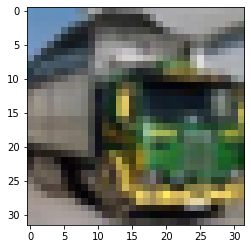

truck


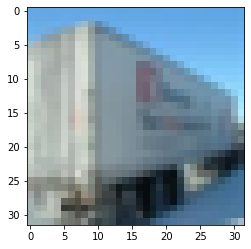

truck


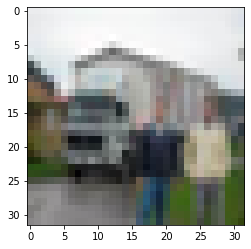

In [31]:
for c in range(10):
    ctr=0
    itr=0
    while(ctr<5):
        if(train_y[itr]==c):
            print(labels_vs_id[train_y[itr]])
            plt.imshow(np.transpose(train_x_img[itr], (1, 2, 0)))
            plt.show()
            ctr+=1
        itr+=1

In [34]:
print(train_x.shape)
print(train_y.shape)
print(train_x[0])
print(train_y[0])

(50000, 3072)
(50000,)
[ 59  43  50 ... 140  84  72]
6


In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(train_x,train_y)

LinearDiscriminantAnalysis()

In [39]:
pred = lda.predict(test_x)

In [47]:
print('Overall accuracy : ',lda.score(test_x,test_y)*100, '%')

Overall accuracy :  37.13 %


In [53]:
c_matrix = confusion_matrix(test_y, pred)
class_wise_accuracy = 100*c_matrix.diagonal()/c_matrix.sum(axis=1)

In [55]:
for y in range(len(class_wise_accuracy)):
    print('Class wise accuracy of class ',y,' : ',class_wise_accuracy[y], '%')

Class wise accuracy of class  0  :  46.3 %
Class wise accuracy of class  1  :  41.5 %
Class wise accuracy of class  2  :  25.5 %
Class wise accuracy of class  3  :  24.5 %
Class wise accuracy of class  4  :  27.1 %
Class wise accuracy of class  5  :  32.9 %
Class wise accuracy of class  6  :  41.3 %
Class wise accuracy of class  7  :  40.4 %
Class wise accuracy of class  8  :  49.4 %
Class wise accuracy of class  9  :  42.4 %
